<a href="https://colab.research.google.com/github/JackGallagher41/IDS/blob/main/Project%206/Project_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Jack Gallagher**

### **Project 6**

December 11, 2023

## **In this problem, you will perform more data analyses on the adult_training dataset that was used previously**

In [4]:
import pandas as pd

#used to import the database
adultTrainingDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

#print the dataframe
adultTrainingDF

adultTrainingDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


## **1. Write four functions to create classification models, record classification accuracy, and plot results. You will need to demonstrate your functions using the following calls (feel free to add extra formal function parameters, as necessary):**

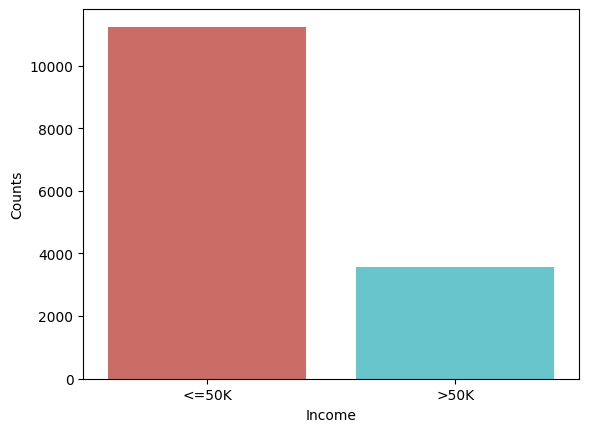

In [5]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=adultTrainingDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

In [6]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultTrainingDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, adultTrainingDF.shape[1]):
    if adultTrainingDF.dtypes[i]=='object' or adultTrainingDF.dtypes[i]=='bool':
        encoded_adultTrainingDF[adultTrainingDF.columns[i]] = le.fit_transform(adultTrainingDF[adultTrainingDF.columns[i]])
    else:
        encoded_adultTrainingDF[adultTrainingDF.columns[i]] = adultTrainingDF[adultTrainingDF.columns[i]]

encoded_adultTrainingDF.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,6,13,2,4,1,0,0,0
1,38,4,9,0,6,1,0,0,0
2,49,4,5,3,8,0,0,0,0
3,52,6,9,2,4,1,0,0,1
4,31,4,14,4,10,0,14084,0,1
5,40,4,11,2,3,1,0,0,1
6,38,4,7,2,12,1,0,0,0
7,43,4,7,2,14,1,0,2042,0
8,54,0,10,2,0,1,0,0,1
9,39,4,9,0,4,1,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultTrainingDF.filter(['age','workclass','education','marital-status','occupation','sex','capital-gain','capital-loss'], axis=1)
y = encoded_adultTrainingDF['income']


# split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)


## **Create the 4 functions:**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Function that is used to make a Decision Tree Model
def makeDTModel(criterion, x_train, y_train, max_depth, max_leaf_nodes):
  dtModel = DecisionTreeClassifier(criterion = criterion, max_leaf_nodes = max_leaf_nodes, max_depth=max_depth, random_state = 120)
  dtModel.fit(x_train, y_train)
  return dtModel


In [9]:
from matplotlib.pyplot import figure
def displayTree(classifier, X):
  figure(figsize=(10, 8), dpi=80)
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), filled = True)
  text_representation = tree.export_text(classifier, feature_names=X.columns.values.tolist())
  print(text_representation)

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def displayCM(classifier, x_train, y_train, x_test, y_test):
  predictions = classifier.predict(x_test)
  confuseM = confusion_matrix(y_true = y_test, y_pred = predictions)
  print(confuseM)

  plt.figure(figsize=(8,8))
  sns.heatmap(confuseM, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')




In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
def compareModels(cart_classifier, c5_classifier):
  # Record CART's classification accuracy on tarining and test datasets
  score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
  score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score




  # Record C5's classification accuracy on tarining and test datasets
  score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
  score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

  labels = ['CART', 'C5.0']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

## **2. Test out on different max leafs and max depths**

In [14]:
#Create each classifier
cart_classifier = makeDTModel("gini", X_train, y_train, 2, 3)
c5_classifier = makeDTModel("entropy", X_train, y_train, 2, 3)

|--- capital-gain <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gain >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- education <= 12.50
|   |   |--- class: 0
|   |--- education >  12.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



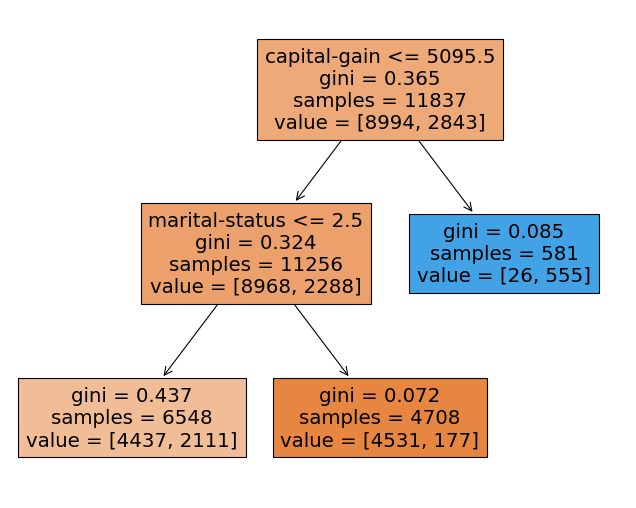

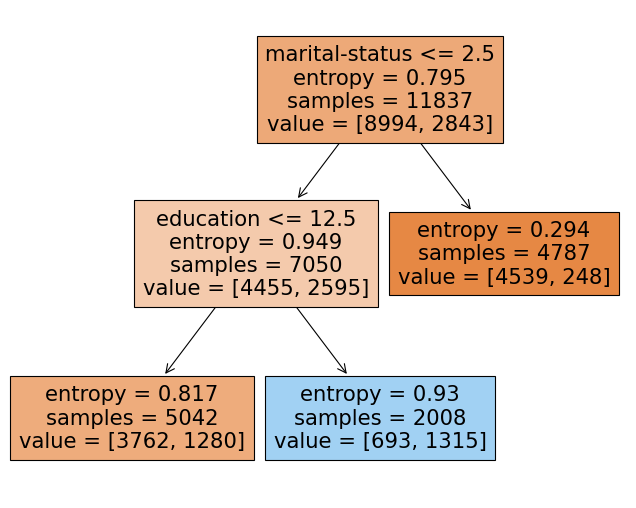

In [18]:
#display the trees
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)


[[2238   11]
 [ 583  128]]
[[2092  157]
 [ 421  290]]


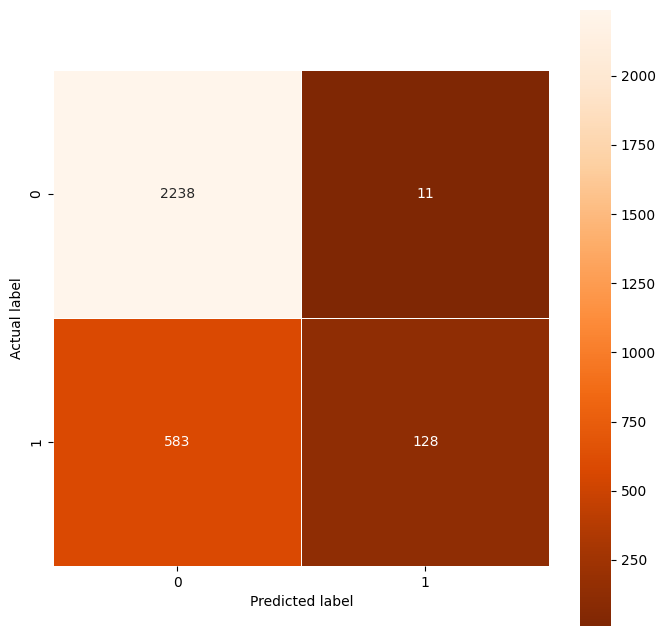

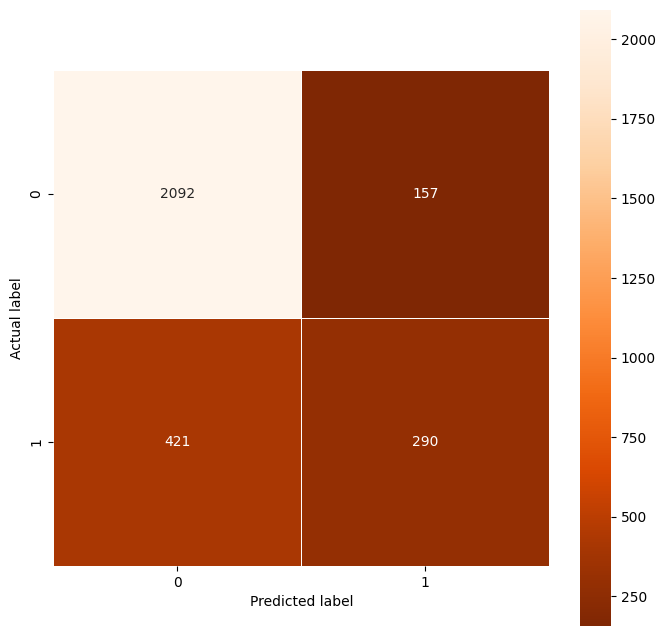

In [19]:
#Display the confusion matrix of each
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

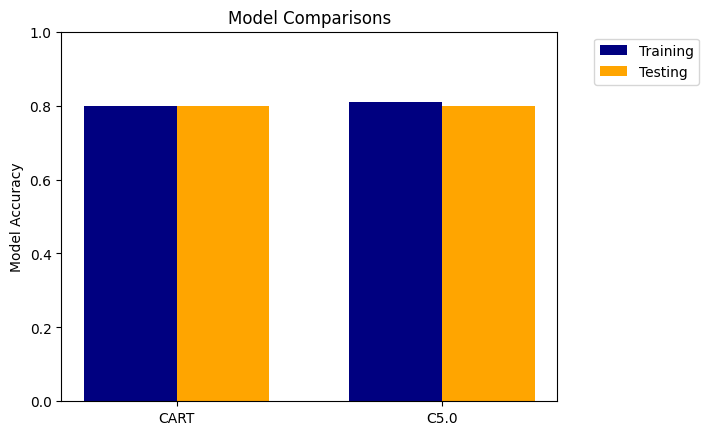

In [20]:
#compare the 2
compareModels(cart_classifier, c5_classifier)

In [21]:
#Create each classifier
cart_classifier = makeDTModel("gini", X_train, y_train, 3, 4)
c5_classifier = makeDTModel("entropy", X_train, y_train, 3, 4)

|--- capital-gain <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- education <= 12.50
|   |   |   |--- class: 0
|   |   |--- education >  12.50
|   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gain >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- education <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- class: 0
|   |   |--- capital-gain >  5095.50
|   |   |   |--- class: 1
|   |--- education >  12.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



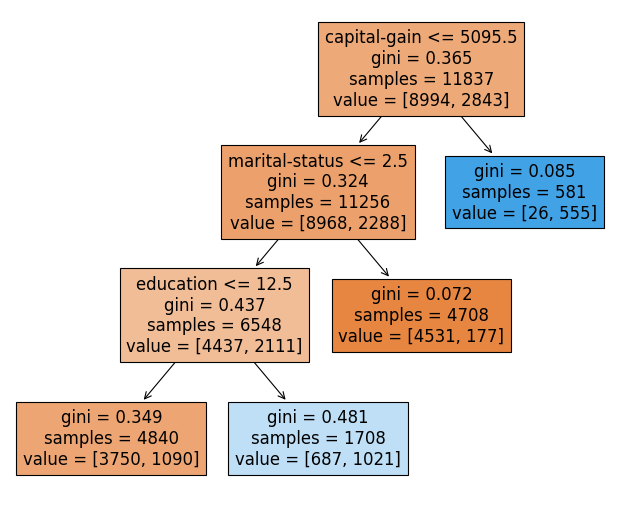

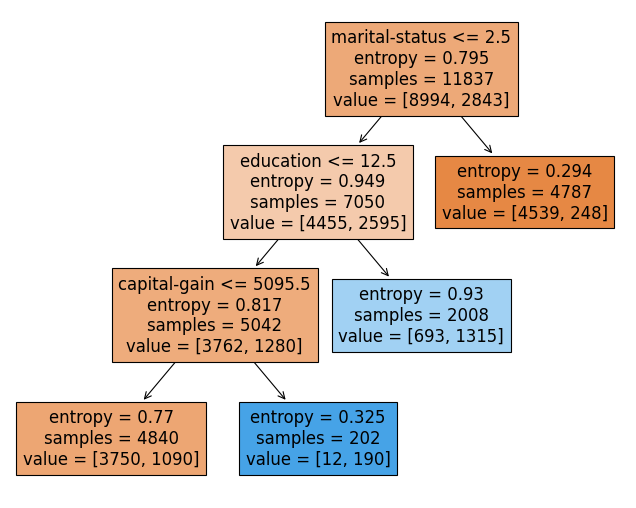

In [22]:
#display the trees
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

[[2083  166]
 [ 352  359]]
[[2088  161]
 [ 366  345]]


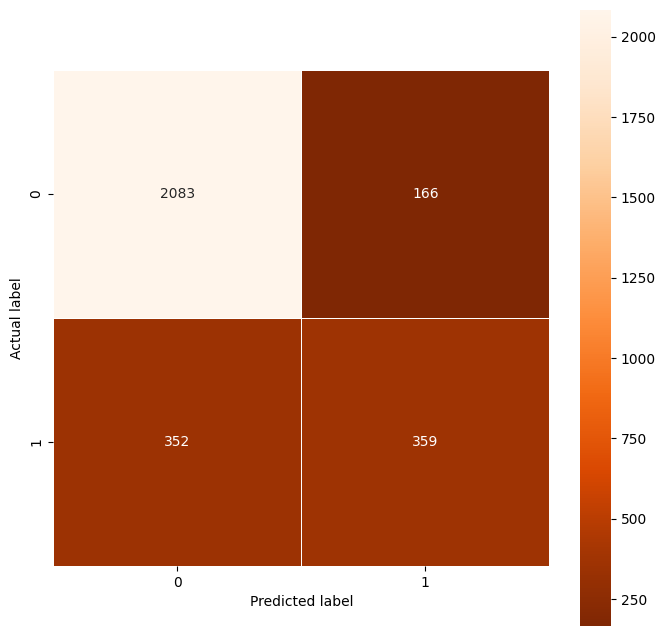

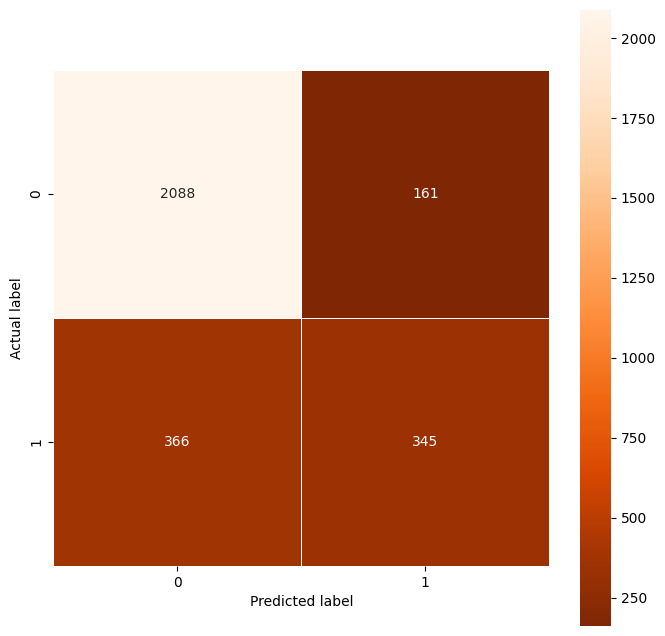

In [23]:
#Display the confusion matrix of each
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

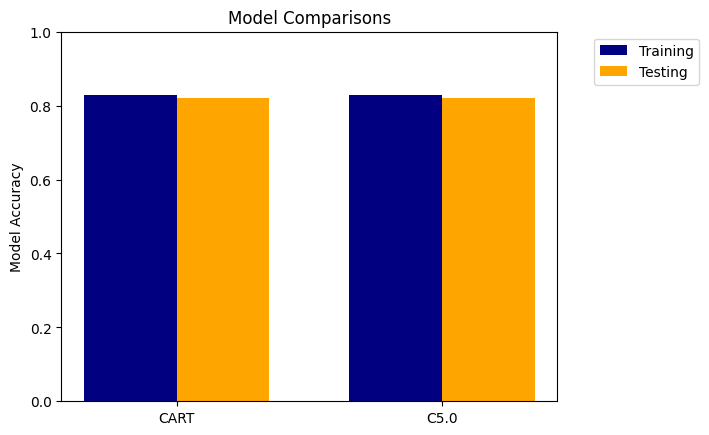

In [24]:
#compare the 2
compareModels(cart_classifier, c5_classifier)

In [25]:
#Create each classifier
cart_classifier = makeDTModel("gini", X_train, y_train, 4, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, 4, 5)

|--- capital-gain <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- education <= 12.50
|   |   |   |--- marital-status <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- marital-status >  0.50
|   |   |   |   |--- class: 0
|   |   |--- education >  12.50
|   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gain >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- education <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- class: 0
|   |   |--- capital-gain >  5095.50
|   |   |   |--- class: 1
|   |--- education >  12.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gain <= 4718.50
|   |   |--- class: 0
|   |--- capital-gain >  4718.50
|   |   |--- class: 1



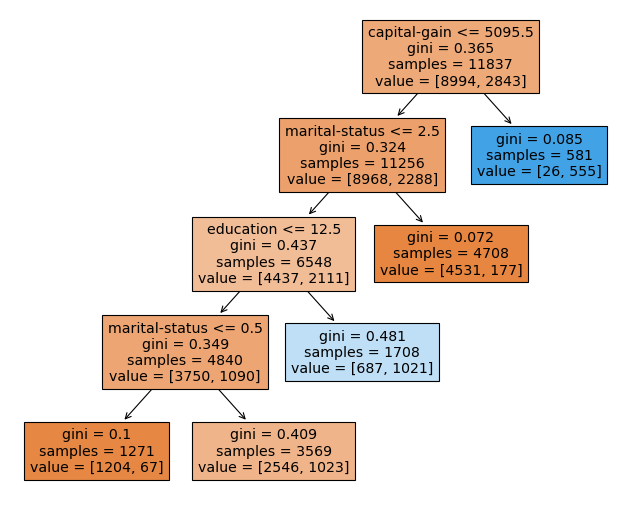

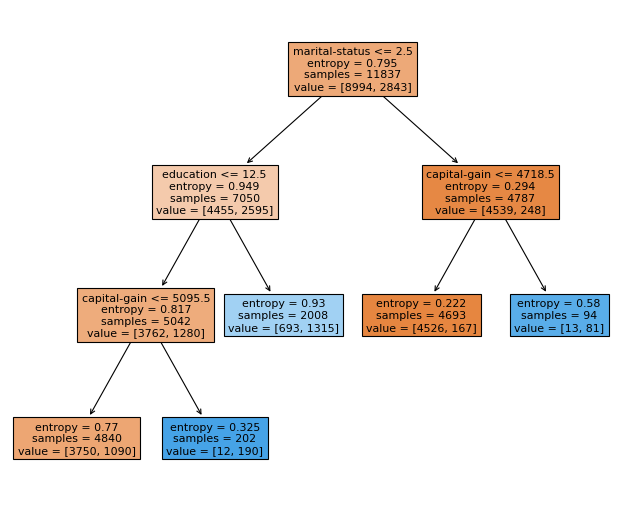

In [26]:
#display the trees
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

[[2083  166]
 [ 352  359]]
[[2080  169]
 [ 352  359]]


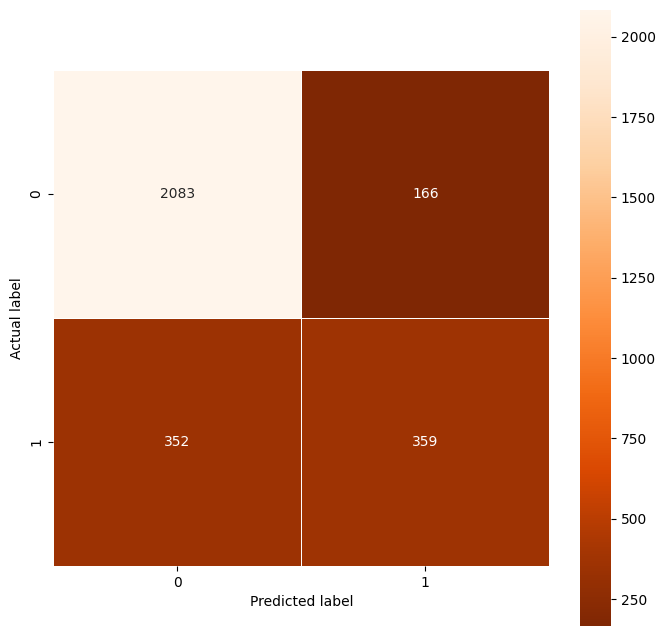

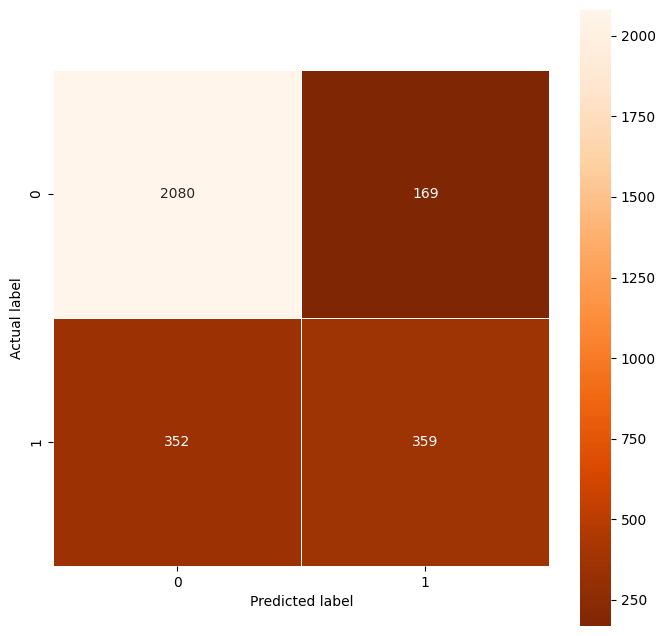

In [27]:
#Display the confusion matrix of each
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

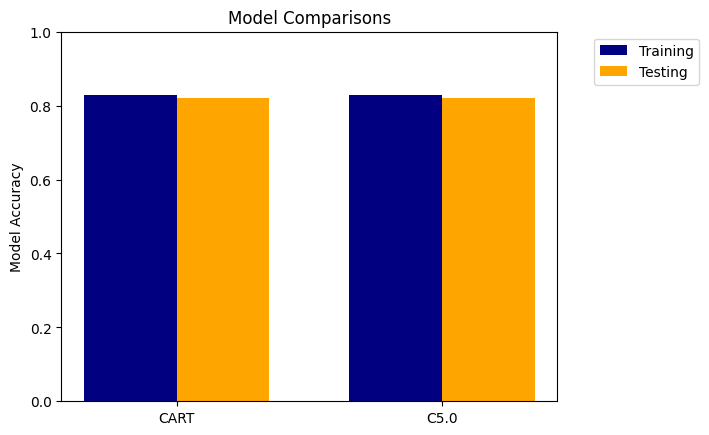

In [28]:
#compare the 2
compareModels(cart_classifier, c5_classifier)

In [30]:
#Create each classifier
cart_classifier = makeDTModel("gini", X_train, y_train, None, None)
c5_classifier = makeDTModel("entropy", X_train, y_train, None, None)

|--- capital-gain <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- education <= 12.50
|   |   |   |--- marital-status <= 0.50
|   |   |   |   |--- capital-gain <= 4668.50
|   |   |   |   |   |--- capital-loss <= 2232.00
|   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |   |--- occupation <= 9.50
|   |   |   |   |   |   |   |   |--- education <= 8.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- education >  8.50
|   |   |   |   |   |   |   |   |   |--- age <= 30.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  30.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 35.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- age >  35.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |--- occupation >  9.50
|   |   |   |   |   |   |   |   |--

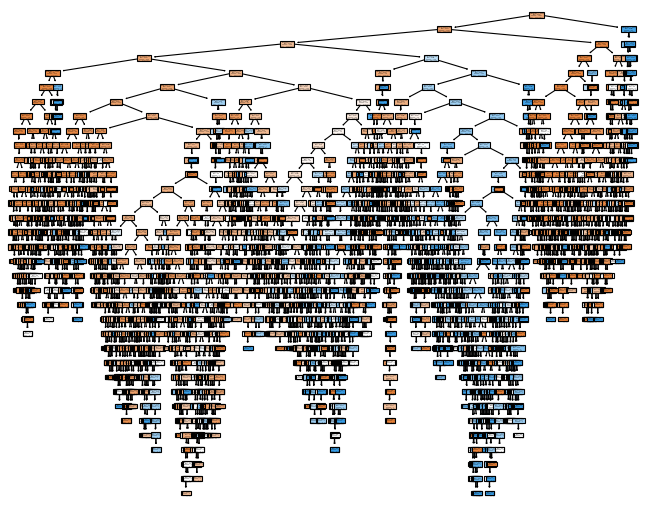

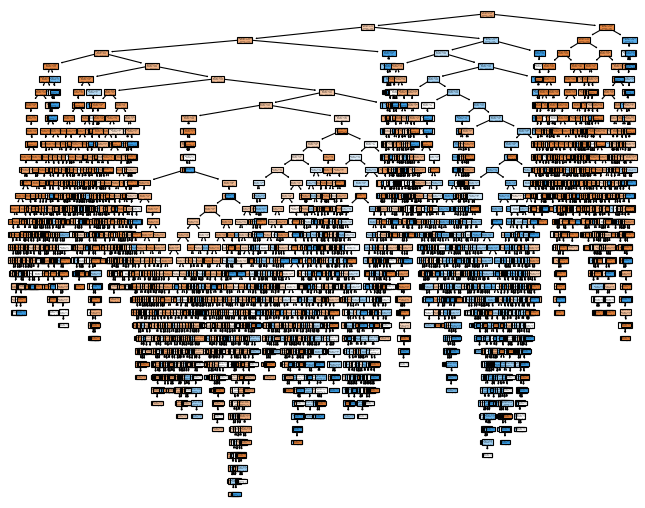

In [31]:
#display the trees
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

[[2021  228]
 [ 290  421]]
[[2020  229]
 [ 299  412]]


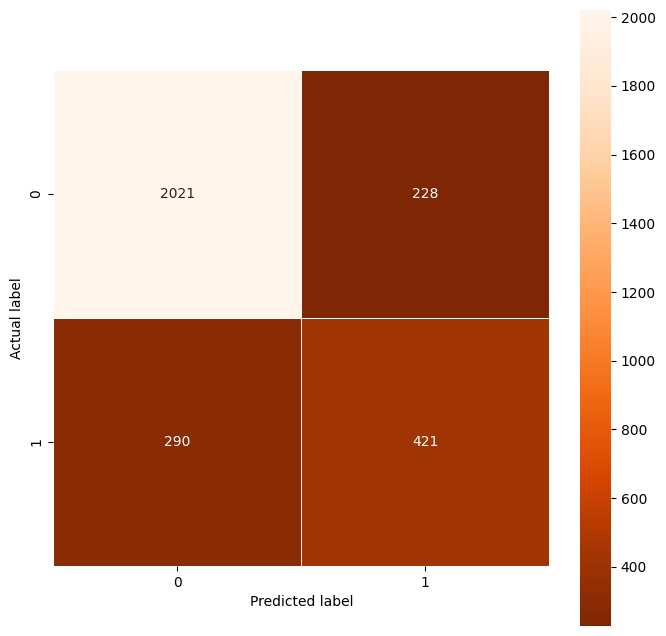

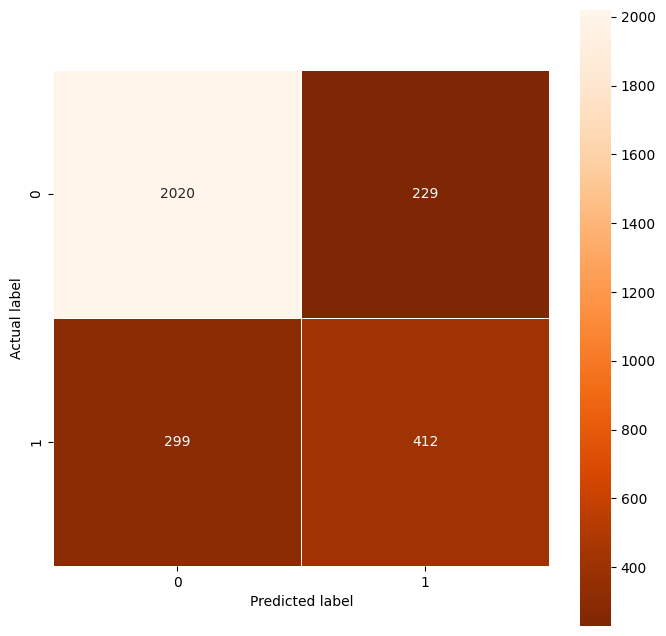

In [32]:
#Display the confusion matrix of each
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

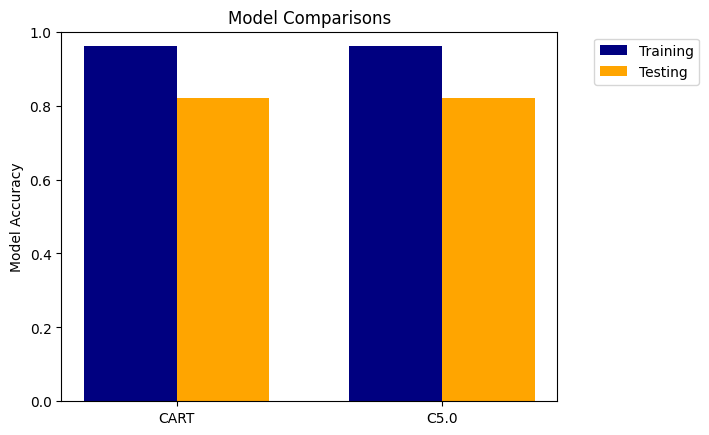

In [33]:
#compare the 2
compareModels(cart_classifier, c5_classifier)

## **3. Summarize**

When looking at the data we are entropy tends to hold a greater value but has simliar tendencies to gini. We are also able to conclude that maxdepth and max leaf nodes hold a importance in finding accurate data. Going either too restrictive or not restrictive at all ends up messing with accuracy and sometimes run time. When creating a tree we should aim to find a healthy balance for both.